# **Music Recommendation System**

## **Problem Definition**

### **The Context:**

 - Why is this problem important to solve?
 1. As almost every internet-based company relies on customer retention on the its website, it's important to create a personalized recommendation system that recommends the right songs to the right users in order to boost up customer satisfactions and prolong customer's retention on the website.
 2. With accurate recommendation system and higher user retention and satisfaction, the company like Spotify can have better competitive advantage in the market and create customer loyalty.
 3. The competitive advantage and better customer retention and loyalty will eventually lead to higher revenue growth by attracting more customers to subscribe to the service or earning more ad revenue as users stay in the platform longer.
 4. From the supply perspective, a good recommendation system can introduce lesser known musicians to their targeted audience and provide better exposure for the emerging talents, creating a better music ecosystem.

### **The objective:**

 - What is the intended goal?

 The objective is to propose top 10 songs to a user based on how likely this user is going to listen to the song. The intended goal is to suggest the 10 songs to the user and in an ideal world, this user should be satisfied with all the 10 songs suggested to him/her and listen to all of them. He/she shall be very content with the suggestions he/she gets and continues to use the platform for music.

### **The key questions:**

- What are the key questions that need to be answered?
1. What features of a song makes the recommendation relevant for users (e.g., genre, mood, lyrics, artists, year, etc.)
2. What kind of data can predict that the user likes a particular song (e.g., does the user listen to the song a lot of time?)
3. How should we do to deal with cold start problem? Should we recommend based on general popularity, assuming the new user will like what the majority of people like?
4. What algorithms will be more effective or be a better match to the objective and main goal of the busines? Or perhaps a hybrid model will have a better performance.

### **The problem formulation**:

- What is it that we are trying to solve using data science?
1. Understand the user data and gain insights on what consititue of user preference as well as similarities among users assuming similar users might like similar songs.
2. Understand the song data and gain insights on similarity among songs as well as the features of every song.
3. Optimize the algorithm by testing or combining different models and conduct hyperparameter tuning to make sure that relevant songs are recommended to the user and what the user got recommended are relevant.

## **Data Dictionary**

The core data is the Taste Profile Subset released by the Echo Nest as part of the Million Song Dataset. There are two files in this dataset. The first file contains the details about the song id, titles, release, artist name, and the year of release. The second file contains the user id, song id, and the play count of users.

**song_data**

- song_id - A unique id given to every song
- title - Title of the song
- Release - Name of the released album
- Artist_name - Name of the artist
- year - Year of release

**count_data**

- user _id - A unique id given to the user
- song_id - A unique id given to the song
- play_count - Number of times the song was played

## **Data Source**
http://millionsongdataset.com/

### **Importing Libraries and the Dataset**

In [1]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Used to ignore the warning given as output of the code
import warnings
warnings.filterwarnings('ignore')

# Basic libraries of python for numeric and dataframe computations
import numpy as np
import pandas as pd

# Import Matplotlib the Basic library for data visualization
import matplotlib.pyplot as plt

# Import seaborn - Slightly advanced library for data visualization
import seaborn as sns

# Import the required library to compute the cosine similarity between two vectors
from sklearn.metrics.pairwise import cosine_similarity

# Import defaultdict from collections A dictionary output that does not raise a key error
from collections import defaultdict

# Impoort mean_squared_error : a performance metrics in sklearn
from sklearn.metrics import mean_squared_error


### **Load the dataset**

In [3]:
# Importing the datasets
count_df = pd.read_csv('/content/drive/MyDrive/Milestone & Capstone/count_data.csv')
song_df = pd.read_csv('/content/drive/MyDrive/Milestone & Capstone/song_data.csv')

### **Understanding the data by viewing a few observations**

In [4]:
# Display first 10 records of count_df data
count_df.head(10)

,Unnamed: 0,user_id,song_id,play_count
0,0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
2,2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
3,3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
4,4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1
5,5,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODDNQT12A6D4F5F7E,5
6,6,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODXRTY12AB0180F3B,1
7,7,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFGUAY12AB017B0A8,1
8,8,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFRQTD12A81C233C0,1
9,9,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOHQWYZ12A6D4FA701,1


In [5]:
# Display first 10 records of song_df data
song_df.head(10)

,song_id,title,release,artist_name,year
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006
3,SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0
5,SOZVAPQ12A8C13B63C,"Symphony No. 1 G minor ""Sinfonie Serieuse""/All...",Berwald: Symphonies Nos. 1/2/3/4,David Montgomery,0
6,SOQVRHI12A6D4FB2D7,We Have Got Love,Strictly The Best Vol. 34,Sasha / Turbulence,0
7,SOEYRFT12AB018936C,2 Da Beat Ch'yall,Da Bomb,Kris Kross,1993
8,SOPMIYT12A6D4F851E,Goodbye,Danny Boy,Joseph Locke,0
9,SOJCFMH12A8C13B0C2,Mama_ mama can't you see ?,March to cadence with the US marines,The Sun Harbor's Chorus-Documentary Recordings,0


In [6]:
# See the top 10 most played songs
count_df.sort_values(by='play_count', ascending=False).head(10)

,Unnamed: 0,user_id,song_id,play_count
1228366,1228366,d13609d62db6df876d3cc388225478618bb7b912,SOFCGSE12AF72A674F,2213
1048310,1048310,50996bbabb6f7857bf0c8019435b5246a0e45cfd,SOUAGPQ12A8AE47B3A,920
1586780,1586780,5ea608df0357ec4fda191cb9316fe8e6e65e3777,SOKOSPK12A8C13C088,879
31179,31179,bb85bb79612e5373ac714fcd4469cabeb5ed94e1,SOZQSVB12A8C13C271,796
1875121,1875121,c012ec364329bb08cbe3e62fe76db31f8c5d8ec3,SOBONKR12A58A7A7E0,683
1644909,1644909,70caceccaa745b6f7bc2898a154538eb1ada4d5a,SOPREHY12AB01815F9,676
1731945,1731945,972cce803aa7beceaa7d0039e4c7c0ff097e4d55,SOJRFWQ12AB0183582,664
1374693,1374693,d2232ac7a1ec17b283b5dff243161902b2cb706c,SOLGIWB12A58A77A05,649
1819571,1819571,f5363481018dc87e8b06f9451e99804610a594fa,SOVRIPE12A6D4FEA19,605
515442,515442,f1bdbb9fb7399b402a09fa124210dedf78e76034,SOZPMJT12AAF3B40D1,585


In [7]:
# See whether there are duplicates in the song_df
print('The shape of song_df is {}'.format(song_df.shape))
print('The number of unique songs is {}'.format(song_df['song_id'].nunique()))
print('The difference between the total data rows and the number of unique songs is {}'.format(len(song_df)-song_df['song_id'].nunique()))

The shape of song_df is (1000000, 5)
The number of unique songs is 999056
The difference between the total data rows and the number of unique songs is 944


### **Let us check the data types and and missing values of each column**

In [8]:
# Display info of count_df
count_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 4 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   Unnamed: 0  int64 
 1   user_id     object
 2   song_id     object
 3   play_count  int64 
dtypes: int64(2), object(2)
memory usage: 61.0+ MB


In [9]:
# Check the number of missing data in count_df
count_df.isna().sum()

Unnamed: 0    0
user_id       0
song_id       0
play_count    0
dtype: int64

In [10]:
# Display info of song_df
song_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   song_id      1000000 non-null  object
 1   title        999985 non-null   object
 2   release      999995 non-null   object
 3   artist_name  1000000 non-null  object
 4   year         1000000 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 38.1+ MB


In [11]:
# Check the number of missing data in count_df
song_df.isna().sum()

song_id         0
title          15
release         5
artist_name     0
year            0
dtype: int64

#### **Observations and Insights:**
- count_df
1. user_id and song_id are object
2. there is no missing value in this dataset
- song_df
1. it's worth to note that 'year' data type is integer
2. there are 15 missing values for 'title'
3. there are 5 missing values for 'release'

In [15]:
# Left merge the count_df and song_df data on "song_id". Drop duplicates from song_df data simultaneously
# Dropping duplicates from song_df
song_df = song_df.drop_duplicates(subset=['song_id'])

# Performing a left merge
# Drop the column 'Unnamed: 0'
## Name the obtained dataframe as "df"
df = pd.merge(count_df, song_df, on='song_id', how='left').drop('Unnamed: 0', axis=1)
df.head()


,user_id,song_id,play_count,title,release,artist_name,year
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,In Between Dreams,Jack Johnson,2005
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999


In [16]:
# Check the info of df
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000000 entries, 0 to 1999999
Data columns (total 7 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   user_id      object
 1   song_id      object
 2   play_count   int64 
 3   title        object
 4   release      object
 5   artist_name  object
 6   year         int64 
dtypes: int64(2), object(5)
memory usage: 122.1+ MB


In [17]:
# Check the number of missing data
df.isna().sum()

user_id        0
song_id        0
play_count     0
title          0
release        0
artist_name    0
year           0
dtype: int64

**Think About It:** As the user_id and song_id are encrypted. Can they be encoded to numeric features?

In [18]:
# Apply label encoding for "user_id" and "song_id"
from sklearn.preprocessing import LabelEncoder

# Initialize label encoder
label_encoder = LabelEncoder()

# Apply label encoding to 'user_id'
df['user_id'] = label_encoder.fit_transform(df['user_id'].astype(str))

# Apply label encoding to 'song_id'
df['song_id'] = label_encoder.fit_transform(df['song_id'].astype(str))

# Now 'user_id' and 'song_id' are encoded
df.head()


,user_id,song_id,play_count,title,release,artist_name,year
0,54961,153,1,The Cove,Thicker Than Water,Jack Johnson,0
1,54961,413,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,54961,736,1,Stronger,Graduation,Kanye West,2007
3,54961,750,1,Constellations,In Between Dreams,Jack Johnson,2005
4,54961,1188,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999


In [19]:
# Check the shape of df
df.shape

(2000000, 7)

In [20]:
# Store the original id and the encoded id as dictionary
user_id_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
song_id_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Print the first 5 entries of the user_id_mapping dictionary
print("User ID Mapping:")
for i, (user_id, encoded_id) in enumerate(user_id_mapping.items()):
    print(f"{user_id}: {encoded_id}")
    if i >= 5:  # Print only the first 5 entries
        break

# Print the first 5 entries of the song_id_mapping dictionary
print("\nSong ID Mapping:")
for i, (song_id, encoded_id) in enumerate(song_id_mapping.items()):
    print(f"{song_id}: {encoded_id}")
    if i >= 5:  # Print only the first 5 entries
        break

User ID Mapping:
SOAAAGQ12A8C1420C8: 0
SOAACPJ12A81C21360: 1
SOAACSG12AB018DC80: 2
SOAAEJI12AB0188AB5: 3
SOAAFAC12A67ADF7EB: 4
SOAAFYH12A8C13717A: 5

Song ID Mapping:
SOAAAGQ12A8C1420C8: 0
SOAACPJ12A81C21360: 1
SOAACSG12AB018DC80: 2
SOAAEJI12AB0188AB5: 3
SOAAFAC12A67ADF7EB: 4
SOAAFYH12A8C13717A: 5


**Think About It:** As the data also contains users who have listened to very few songs and vice versa, is it required to filter the data so that it contains users who have listened to a good count of songs and vice versa?

A dataset of size 2000000 rows x 7 columns can be quite large and may require a lot of computing resources to process. This can lead to long processing times and can make it difficult to train and evaluate your model efficiently.
In order to address this issue, it may be necessary to trim down your dataset to a more manageable size.

In [21]:
# Check the shape of the original data before operation of the following processes
df.shape

(2000000, 7)

In [22]:
# Get the column containing the users
users = df.user_id

# Create a dictionary that maps users(listeners) to the number of songs that they have listened to
playing_count = dict()

for user in users:
    # If we already have the user, just add 1 to their playing count
    if user in playing_count:
        playing_count[user] += 1

    # Otherwise, set their playing count to 1
    else:
        playing_count[user] = 1

In [23]:
# We want our users to have listened at least 90 songs
SONG_COUNT_CUTOFF = 90

# Create a list of users who need to be removed
remove_users = []

for user, num_songs in playing_count.items():

    if num_songs < SONG_COUNT_CUTOFF:
        remove_users.append(user)

df = df.loc[ ~ df.user_id.isin(remove_users)]

In [24]:
# Get the column containing the songs
songs = df.song_id

# Create a dictionary that maps songs to its number of users(listeners)
playing_count = dict()

for song in songs:
    # If we already have the song, just add 1 to their playing count
    if song in playing_count:
        playing_count[song] += 1

    # Otherwise, set their playing count to 1
    else:
        playing_count[song] = 1

In [25]:
# We want our song to be listened by atleast 120 users to be considred
LISTENER_COUNT_CUTOFF = 120

remove_songs = []

for song, num_users in playing_count.items():
    if num_users < LISTENER_COUNT_CUTOFF:
        remove_songs.append(song)

df_final= df.loc[ ~ df.song_id.isin(remove_songs)]

Out of all the songs available, songs with play_count less than or equal to 5 are in almost 90% abundance. So for building the recommendation system let us consider only those songs.

In [26]:
# Keep only records of songs with play_count less than or equal to (<=) 5
df_final = df_final[df_final.play_count<=5]

In [27]:
# Check the shape of the data
df_final.shape

(117876, 7)

In [28]:
# Check how many rows have been removed
print('The number of rows being removed: {}'.format(len(df)-len(df_final)))

The number of rows being removed: 320514


## **Exploratory Data Analysis**

### **Let's check the total number of unique users, songs, artists in the data**

Total number of unique user id

In [29]:
# Display total number of unique user_id
print('The total number of unique user_id is {}'.format(df_final['user_id'].nunique()))

The total number of unique user_id is 3155


Total number of unique song id

In [30]:
# Display total number of unique song_id
print('The total number of unique song_id is {}'.format(df_final['song_id'].nunique()))

The total number of unique song_id is 563


Total number of unique artists

In [31]:
# Display total number of unique artists
print('The total number of unique artists is {}'.format(df_final['artist_name'].nunique()))

The total number of unique artists is 232


#### **Observations and Insights:**
- The total number of unique user_id is 3155
- The total number of unique song_id is 563
- The total number of unique artists is 232

The number of users is almost 6 times of the number of songs available. The number of songs is more than 2 times of the number of artists.


### **Let's find out about the most interacted songs and interacted users**

Most interacted songs

In [32]:
# Group by 'song_id' and count the number of interactions for each song
interacted_songs = df_final.groupby('song_id').size().reset_index(name='interaction_count')
interacted_songs_sorted = interacted_songs.sort_values(by='interaction_count', ascending=False)

# Display the Top 10 most interacted songs
top_n = 10
top_interacted_songs = interacted_songs_sorted.head(top_n)
top_interacted_songs

,song_id,interaction_count
490,8582,751
24,352,748
136,2220,713
70,1118,662
229,4152,652
309,5531,618
248,4448,609
347,6189,606
356,6293,583
84,1334,570


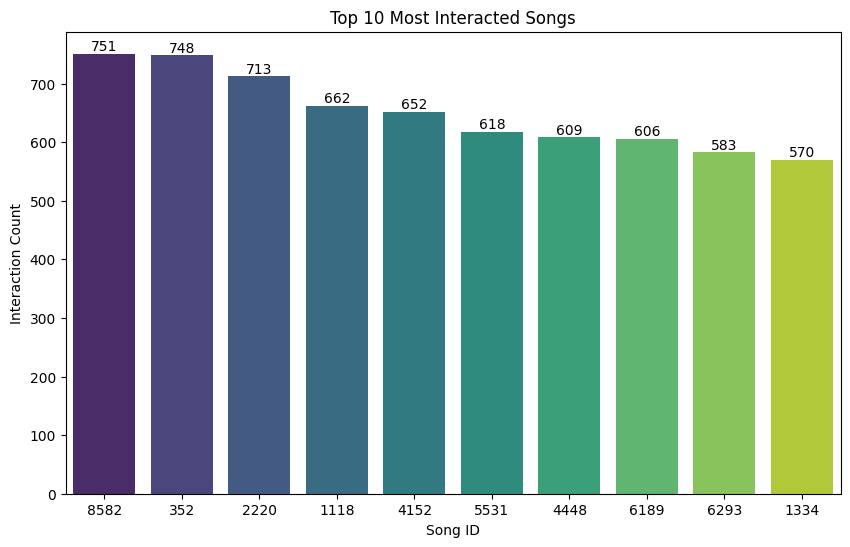

In [33]:
# Plot the top 10 interacted songs
plt.figure(figsize=(10, 6))
ax_song = sns.barplot(x='song_id', y='interaction_count', data=top_interacted_songs, palette='viridis',
            order=top_interacted_songs['song_id'])
# Annotate each bar with its interaction count
for p in ax_song.patches:
    ax_song.text(p.get_x() + p.get_width() / 2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=10, color='black', ha='center', va='bottom')
# Set the other labels
plt.xlabel('Song ID')
plt.ylabel('Interaction Count')
plt.title('Top ' + str(top_n) + ' Most Interacted Songs')
plt.show()

Most interacted users

In [34]:
# Group by 'user_id' and count the number of interactions for each user
interacted_users = df_final.groupby('user_id').size().reset_index(name='interaction_count')
interacted_users_sorted = interacted_users.sort_values(by='interaction_count', ascending=False)

# Display the Top 10 most interacted users
top_n = 10
top_interacted_users = interacted_users_sorted.head(top_n)
top_interacted_users

,user_id,interaction_count
2547,61472,243
661,15733,227
1561,37049,202
398,9570,184
964,23337,177
440,10763,176
376,9097,175
1106,26616,175
1791,43041,174
2715,65994,171


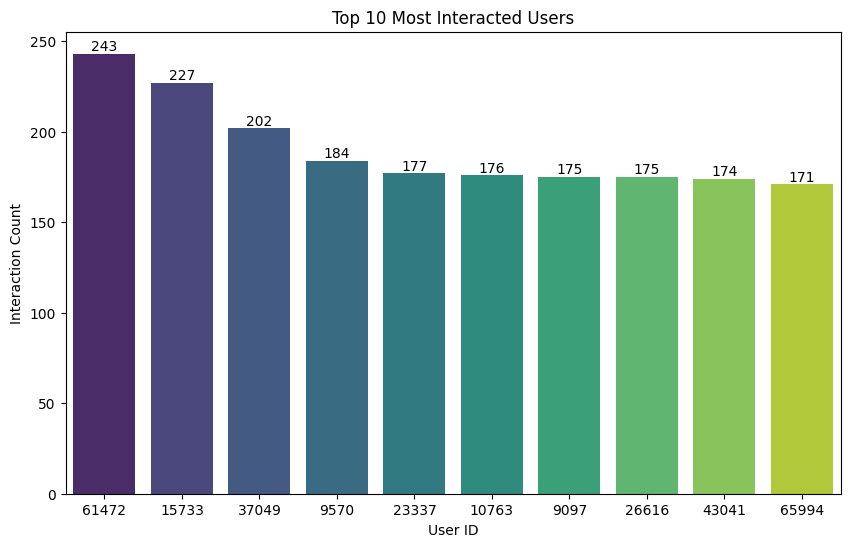

In [35]:
# Plot the top 10 interacted users
plt.figure(figsize=(10, 6))
ax_user = sns.barplot(x='user_id', y='interaction_count', data=top_interacted_users, palette='viridis',
            order=top_interacted_users['user_id'])
# Annotate each bar with its interaction count
for p in ax_user.patches:
    ax_user.text(p.get_x() + p.get_width() / 2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=10, color='black', ha='center', va='bottom')
# Set the other labels
plt.xlabel('User ID')
plt.ylabel('Interaction Count')
plt.title('Top ' + str(top_n) + ' Most Interacted Users')
plt.show()

#### **Observations and Insights:**
1. Encoded Song ID 8582 is the most interacted song. It appears 751 times in the data.
2. The top 10 most interacted songs are:
- song_id: 8582	| interaction_count: 751
- song_id: 352 	| interaction_count: 748
- song_id: 2220	| interaction_count: 713
- song_id: 1118	| interaction_count: 662
- song_id: 4152	| interaction_count: 652
- song_id: 5531	| interaction_count: 618
- song_id: 4448	| interaction_count: 609
- song_id: 6189	| interaction_count: 606
- song_id: 6293	| interaction_count: 583
- song_id: 1334	| interaction_count: 570
3. Encoded User ID 61472 is the most active user. He/She appears 243 times in the data.
3. The top 10 most interacted users are:
- user_id: 61472 | interaction_count: 243
- user_id: 15733 | interaction_count: 227
- user_id: 37049 | interaction_count: 202
- user_id: 9570 | interaction_count: 184
- user_id: 23337 | interaction_count: 177
- user_id: 10763 | interaction_count: 176
- user_id: 9097 | interaction_count: 175
- user_id: 26616 | interaction_count: 175
- user_id: 43041 | interaction_count: 174
- user_id: 65994 | interaction_count: 171

Songs released on yearly basis

In [36]:
# Find out the number of songs released in a year, use the songs_df
  # Hint: Use groupby function on the 'year' colum

# Check the year column
song_df.year.unique()

array([2003, 1995, 2006,    0, 1993, 2007, 1997, 2005, 1998, 1994, 2009,
       1996, 2001, 2004, 2002, 1977, 2008, 1992, 1979, 1988, 2010, 1990,
       1981, 2000, 1978, 1991, 1989, 1999, 1975, 1969, 1982, 1966, 1972,
       1967, 1984, 1950, 1986, 1970, 1959, 1971, 1980, 1987, 1985, 1963,
       1973, 1958, 1961, 1938, 1939, 1983, 1929, 1964, 1948, 1968, 1976,
       1965, 1960, 1974, 1945, 1962, 1957, 1956, 1954, 1943, 1952, 1953,
       1955, 1951, 1931, 1928, 1937, 1949, 1935, 1941, 1947, 1934, 1940,
       1926, 1932, 1922, 1930, 1936, 1942, 1944, 1933, 1946, 1927, 2011,
       1925, 1924])

In [38]:
# Find out the number of songs played in a year
  # Hint: Use groupby function on the 'year' column

# Check the year column
df_final.year.unique()

array([2000, 2004, 2007,    0, 2003, 2009, 2006, 2002, 2008, 2005, 2001,
       1999, 1996, 1992, 1982, 2010, 1994, 1993, 1997, 1991, 1976, 1986,
       1987, 1988, 1974, 1979, 1980, 1983, 1969, 1971, 1975, 1990, 1973,
       1970, 1995, 1981, 1978])

In [39]:
num_total_songs_per_year = pd.DataFrame(df_final.groupby('year')['song_id'].count())
num_total_songs_per_year

,song_id
year,
0,20649
1969,238
1970,109
1971,133
1973,270
1974,583
1975,173
1976,478
1978,119


In [40]:
num_unique_songs_per_year = pd.DataFrame(df_final.groupby('year')['song_id'].nunique())
num_unique_songs_per_year

,song_id
year,
0,85
1969,2
1970,1
1971,1
1973,1
1974,2
1975,1
1976,2
1978,1


In [41]:
# Check the two songs in year 1969 as an example
df_final[df_final['year']==1969]['song_id'].unique()

array([ 118, 4725])

In [42]:
# Check how many times these two songs are played in year 1969
df_final_1969 = df_final[df_final['year'] == 1969]

# Define the two specific songs
song1 = df_final[df_final['year']==1969]['song_id'].unique()[0]
song2 = df_final[df_final['year']==1969]['song_id'].unique()[1]

# Count the occurrences of each song in the year 1969 using the count() method
song1_count = df_final_1969[df_final_1969['song_id'] == song1]['song_id'].count()
song2_count = df_final_1969[df_final_1969['song_id'] == song2]['song_id'].count()

# Print the counts for the two songs
print("Number of times", song1, "is played in 1969:", song1_count)
print("Number of times", song2, "is played in 1969:", song2_count)

Number of times 118 is played in 1969: 112
Number of times 4725 is played in 1969: 126


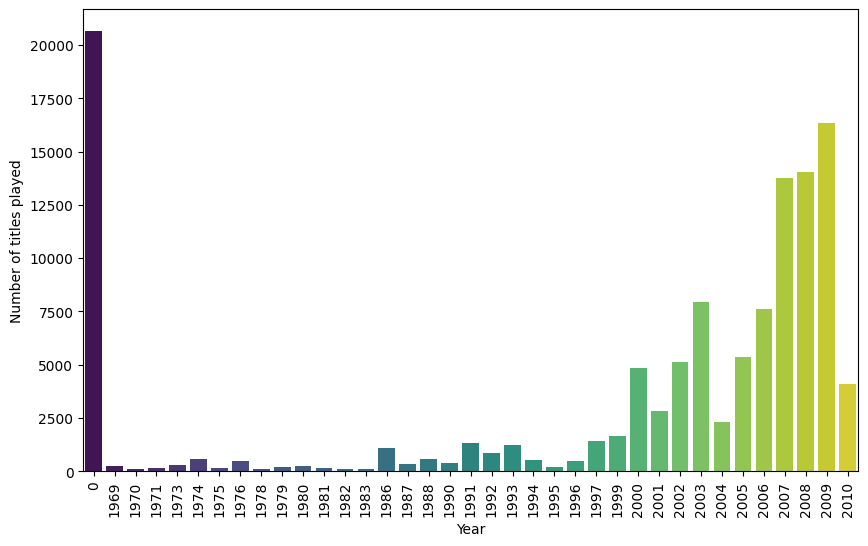

In [43]:
# Create a barplot plot with y label as "number of titles played" and x -axis year

# Set the figure size
plt.figure(figsize=(10, 6))

sns.barplot(x='year', y='song_id', data=num_total_songs_per_year, palette='viridis')

# Set the x label of the plot
plt.xlabel('Year')

# Rotate x-axis tick labels by 90 degrees
plt.xticks(rotation=90)

# Set the y label of the plot
plt.ylabel('Number of titles played')

# Show the plot
plt.show()

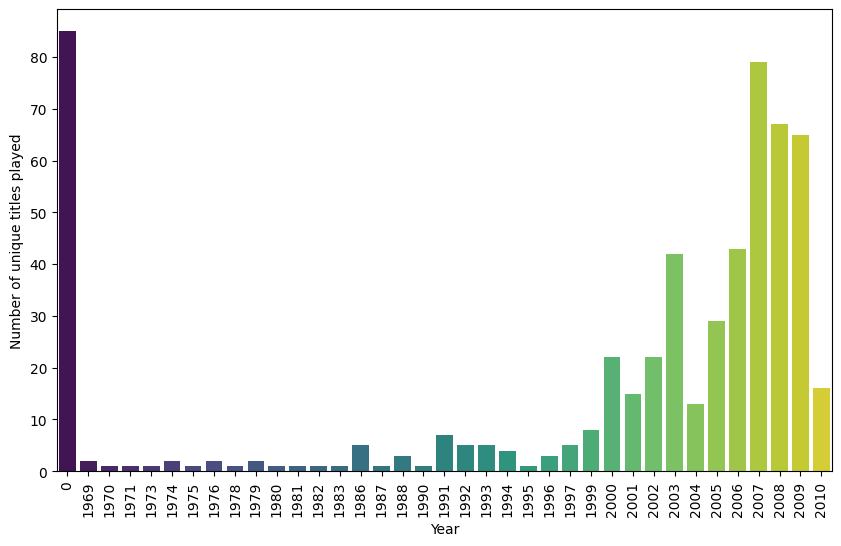

In [44]:
# Create a barplot plot with y label as "number of titles played" and x -axis year

# Set the figure size
plt.figure(figsize=(10, 6))

sns.barplot(x='year', y='song_id', data=num_unique_songs_per_year, palette='viridis')

# Set the x label of the plot
plt.xlabel('Year')

# Rotate x-axis tick labels by 90 degrees
plt.xticks(rotation=90)

# Set the y label of the plot
plt.ylabel('Number of unique titles played')

# Show the plot
plt.show()

#### **Observations and Insights:** #

The year labeled '0' contains 20649 rows of data, which might be caused by the some data missing the year value and these data are all labeled as '0'.

Despite the year "0", the number of songs played in a year increased drastically as the year of release reached 2000.

This might due to the fact that as the technology advanced and internet became more and more prominent, users gradually turned to the internet for music, especially the younger generation who are already used to this type of streaming style. As trend is also a crucial factor for music popularity, younger generation (likely those who use the platform) usually listen to the songs that are newly released or trending. It's less likely that they would search for songs that are 20 years older than themselves. However, as there is no data about the user age, it's not possible to varify this hypothesis.

Another possible explanation is that the music company started to release digital version of the songs. The availability of the songs contributes to the distribution of the number of songs played in a year. The almost identical distribution between "number of titles played" and "number of unique titles played" can support this assumption.

Explaining the sudden drop in year 2004 and year 2010 is out of the scope of the data available.


**Think About It:** What other insights can be drawn using exploratory data analysis?

Now that we have explored the data, let's apply different algorithms to build recommendation systems.

**Note:** Use the shorter version of the data, i.e., the data after the cutoffs as used in Milestone 1.

## Building various models

### **Popularity-Based Recommendation Systems**

Let's take the count and sum of play counts of the songs and build the popularity recommendation systems based on the sum of play counts.

In [ ]:
# Calculating average play_count
       # Hint: Use groupby function on the song_id column

# Calculating the frequency a song is played
      # Hint: Use groupby function on the song_id column

In [ ]:
# Making a dataframe with the average_count and play_freq

# Let us see the first five records of the final_play dataset


Now, let's create a function to find the top n songs for a recommendation based on the average play count of song. We can also add a threshold for a minimum number of playcounts for a song to be considered for recommendation.

In [ ]:
# Build the function to find top n songs

In [ ]:
# Recommend top 10 songs using the function defined above

### **User User Similarity-Based Collaborative Filtering**

To build the user-user-similarity-based and subsequent models we will use the "surprise" library.

In [ ]:
# Install the surprise package using pip. Uncomment and run the below code to do the same

# !pip install surprise

In [ ]:
# Import necessary libraries

# To compute the accuracy of models


# This class is used to parse a file containing play_counts, data should be in structure - user; item; play_count


# Class for loading datasets


# For tuning model hyperparameters


# For splitting the data in train and test dataset


# For implementing similarity-based recommendation system


# For implementing matrix factorization based recommendation system


# For implementing KFold cross-validation

# For implementing clustering-based recommendation system


### Some useful functions

Below is the function to calculate precision@k and recall@k, RMSE, and F1_Score@k to evaluate the model performance.

**Think About It:** Which metric should be used for this problem to compare different models?

In [ ]:
def precision_recall_at_k(model, k=30, threshold=1.5):
    """Return precision and recall at k metrics for each user"""

    # First map the predictions to each user.
    user_est_true = defaultdict(list)

    #Making predictions on the test data
    predictions = model.test(testset)

    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, playing_count in user_est_true.items():

        # Sort play count by estimated value
        playing_count.sort(key=lambda x: x[0], reverse=True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in playing_count)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in playing_count[:k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in playing_count[:k])

        # Precision@K: Proportion of recommended items that are relevant
        # When n_rec_k is 0, Precision is undefined. We here set Precision to 0 when n_rec_k is 0.

        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

        # Recall@K: Proportion of relevant items that are recommended
        # When n_rel is 0, Recall is undefined. We here set Recall to 0 when n_rel is 0.

        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0

    #Mean of all the predicted precisions are calculated.
    precision = round((sum(prec for prec in precisions.values()) / len(precisions)),3)
    #Mean of all the predicted recalls are calculated.
    recall = round((sum(rec for rec in recalls.values()) / len(recalls)),3)

    accuracy.rmse(predictions)
    print('Precision: ', precision) #Command to print the overall precision
    print('Recall: ', recall) #Command to print the overall recall
    print('F_1 score: ', round((2*precision*recall)/(precision+recall),3)) # Formula to compute the F-1 score.

**Think About It:** In the function precision_recall_at_k above the threshold value used is 1.5. How precision and recall are affected by changing the threshold? What is the intuition behind using the threshold value of 1.5?

Below we are loading the **dataset**, which is a **pandas dataframe**, into a **different format called `surprise.dataset.DatasetAutoFolds`** which is required by this library. To do this we will be **using the classes `Reader` and `Dataset`**

You will also notice here that we read the dataset by providing a scale of ratings. However, as you would know, we do not have ratings data of the songs. In this case, we are going to use play_count as a proxy for ratings with the assumption that the more the user listens to a song, the higher the chance that they like the song

In [ ]:
# Instantiating Reader scale with expected rating scale
 #use rating scale (0, 5)

# Loading the dataset
 # Take only "user_id","song_id", and "play_count"

# Splitting the data into train and test dataset
 # Take test_size = 0.4, random_state = 42

**Think About It:** How changing the test size would change the results and outputs?

In [ ]:
# Build the default user-user-similarity model


# KNN algorithm is used to find desired similar items
 # Use random_state = 1

# Train the algorithm on the trainset, and predict play_count for the testset


# Let us compute precision@k, recall@k, and f_1 score with k = 30
 # Use sim_user_user model

**Observations and Insights:_________**

In [ ]:
# Predicting play_count for a sample user with a listened song
# Use any user id  and song_id

In [ ]:
# Predicting play_count for a sample user with a song not-listened by the user
 #predict play_count for any sample user

**Observations and Insights:_________**

Now, let's try to tune the model and see if we can improve the model performance.

In [ ]:
# Setting up parameter grid to tune the hyperparameters


# Performing 3-fold cross-validation to tune the hyperparameters

# Fitting the data
 # Use entire data for GridSearch

# Best RMSE score

# Combination of parameters that gave the best RMSE score


In [ ]:
# Train the best model found in above gridsearch


**Observations and Insights:_________**

In [ ]:
# Predict the play count for a user who has listened to the song. Take user_id 6958, song_id 1671 and r_ui = 2


In [ ]:
# Predict the play count for a song that is not listened to by the user (with user_id 6958)


**Observations and Insights:______________**

**Think About It:** Along with making predictions on listened and unknown songs can we get 5 nearest neighbors (most similar) to a certain song?

In [ ]:
# Use inner id 0


Below we will be implementing a function where the input parameters are:

- data: A **song** dataset
- user_id: A user-id **against which we want the recommendations**
- top_n: The **number of songs we want to recommend**
- algo: The algorithm we want to use **for predicting the play_count**
- The output of the function is a **set of top_n items** recommended for the given user_id based on the given algorithm

In [ ]:
def get_recommendations(data, user_id, top_n, algo):

    # Creating an empty list to store the recommended song ids


    # Creating an user item interactions matrix


    # Extracting those song ids which the user_id has not played yet

    # Looping through each of the song ids which user_id has not interacted yet


        # Predicting the users for those non played song ids by this user


        # Appending the predicted play_counts

    # Sorting the predicted play_counts in descending order


    return # Returing top n highest predicted play_count songs for this user

In [ ]:
# Make top 5 recommendations for any user_id with a similarity-based recommendation engine


In [ ]:
# Building the dataframe for above recommendations with columns "song_id" and "predicted_play_count"


**Observations and Insights:______________**

### Correcting the play_counts and Ranking the above songs

In [ ]:
def ranking_songs(recommendations, playing_count):
  # Sort the songs based on play counts

  # Merge with the recommended songs to get predicted play_counts

  # Rank the songs based on corrected play_counts

  # Sort the songs based on corrected play_counts

  return

**Think About It:** In the above function to correct the predicted play_count a quantity 1/np.sqrt(n) is subtracted. What is the intuition behind it? Is it also possible to add this quantity instead of subtracting?

In [ ]:
# Applying the ranking_songs function on the final_play data


**Observations and Insights:______________**

### Item Item Similarity-based collaborative filtering recommendation systems

In [ ]:
# Apply the item-item similarity collaborative filtering model with random_state = 1 and evaluate the model performance


**Observations and Insights:______________**

In [ ]:
# Predicting play count for a sample user_id 6958 and song (with song_id 1671) listened to by the user


In [ ]:
# Predict the play count for a user that has not listened to the song (with song_id 1671)

**Observations and Insights:______________**

In [ ]:
# Apply grid search for enhancing model performance

# Setting up parameter grid to tune the hyperparameters


# Performing 3-fold cross-validation to tune the hyperparameters

# Fitting the data


# Find the best RMSE score

# Extract the combination of parameters that gave the best RMSE score


**Think About It:** How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the list of hyperparameters [here](https://surprise.readthedocs.io/en/stable/knn_inspired.html).

In [ ]:
# Apply the best model found in the grid search


**Observations and Insights:______________**

In [ ]:
# Predict the play_count by a user(user_id 6958) for the song (song_id 1671)


In [ ]:
# Predicting play count for a sample user_id 6958 with song_id 3232 which is not listened to by the user


**Observations and Insights:______________**

In [ ]:
# Find five most similar items to the item with inner id 0


In [ ]:
# Making top 5 recommendations for any user_id  with item_item_similarity-based recommendation engine


In [ ]:
# Building the dataframe for above recommendations with columns "song_id" and "predicted_play_count"


In [ ]:
# Applying the ranking_songs function


**Observations and Insights:_________**

### Model Based Collaborative Filtering - Matrix Factorization

Model-based Collaborative Filtering is a **personalized recommendation system**, the recommendations are based on the past behavior of the user and it is not dependent on any additional information. We use **latent features** to find recommendations for each user.

In [ ]:
# Build baseline model using svd


In [ ]:
# Making prediction for user (with user_id 6958) to song (with song_id 1671), take r_ui = 2


In [ ]:
# Making a prediction for the user who has not listened to the song (song_id 3232)


#### Improving matrix factorization based recommendation system by tuning its hyperparameters

In [ ]:
# Set the parameter space to tune


# Performe 3-fold grid-search cross-validation


# Fitting data

# Best RMSE score

# Combination of parameters that gave the best RMSE score


**Think About It**: How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the available hyperparameters [here](https://surprise.readthedocs.io/en/stable/matrix_factorization.html).

In [ ]:
# Building the optimized SVD model using optimal hyperparameters


**Observations and Insights:_________**

In [ ]:
# Using svd_algo_optimized model to recommend for userId 6958 and song_id 1671


In [ ]:
# Using svd_algo_optimized model to recommend for userId 6958 and song_id 3232 with unknown baseline play_count


**Observations and Insights:_________**

In [ ]:
# Getting top 5 recommendations for user_id 6958 using "svd_optimized" algorithm


In [ ]:
# Ranking songs based on above recommendations

**Observations and Insights:_________**

### Cluster Based Recommendation System

In **clustering-based recommendation systems**, we explore the **similarities and differences** in people's tastes in songs based on how they rate different songs. We cluster similar users together and recommend songs to a user based on play_counts from other users in the same cluster.

In [ ]:
# Make baseline clustering model


In [ ]:
# Making prediction for user_id 6958 and song_id 1671


In [ ]:
# Making prediction for user (userid 6958) for a song(song_id 3232) not listened to by the user


#### Improving clustering-based recommendation system by tuning its hyper-parameters

In [ ]:
# Set the parameter space to tune


# Performing 3-fold grid search cross-validation

# Fitting data

# Best RMSE score

# Combination of parameters that gave the best RMSE score


**Think About It**: How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the available hyperparameters [here](https://surprise.readthedocs.io/en/stable/co_clustering.html).

In [ ]:
# Train the tuned Coclustering algorithm


**Observations and Insights:_________**

In [ ]:
# Using co_clustering_optimized model to recommend for userId 6958 and song_id 1671


In [ ]:
# Use Co_clustering based optimized model to recommend for userId 6958 and song_id 3232 with unknown baseline play_count


**Observations and Insights:_________**

#### Implementing the recommendation algorithm based on optimized CoClustering model

In [ ]:
# Getting top 5 recommendations for user_id 6958 using "Co-clustering based optimized" algorithm


### Correcting the play_count and Ranking the above songs

In [ ]:
# Ranking songs based on the above recommendations


**Observations and Insights:_________**

### Content Based Recommendation Systems

**Think About It:** So far we have only used the play_count of songs to find recommendations but we have other information/features on songs as well. Can we take those song features into account?

In [ ]:
# Concatenate the "title", "release", "artist_name" columns to create a different column named "text"

In [ ]:
# Select the columns 'user_id', 'song_id', 'play_count', 'title', 'text' from df_small data

# Drop the duplicates from the title column

# Set the title column as the index

# See the first 5 records of the df_small dataset


In [ ]:
# Create the series of indices from the data


In [ ]:
# Importing necessary packages to work with text data
import nltk

# Download punkt library


# Download stopwords library


# Download wordnet


# Import regular expression


# Import word_tokenizer


# Import WordNetLemmatizer

# Import stopwords


# Import CountVectorizer and TfidfVectorizer


We will create a **function to pre-process the text data:**

In [ ]:
# Create a function to tokenize the text

In [ ]:
# Create tfidf vectorizer

# Fit_transfrom the above vectorizer on the text column and then convert the output into an array


In [ ]:
# Compute the cosine similarity for the tfidf above output


 Finally, let's create a function to find most similar songs to recommend for a given song.

In [ ]:
# Function that takes in song title as input and returns the top 10 recommended songs
def recommendations(title, similar_songs):



    # Getting the index of the song that matches the title


    # Creating a Series with the similarity scores in descending order


    # Getting the indexes of the 10 most similar songs


    # Populating the list with the titles of the best 10 matching songs


    return

Recommending 10 songs similar to Learn to Fly

In [ ]:
# Make the recommendation for the song with title 'Learn To Fly'


**Observations and Insights:_________**

## **Conclusion and Recommendations**

**1. Comparison of various techniques and their relative performance based on chosen Metric (Measure of success)**:
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

**2. Refined insights**:
- What are the most meaningful insights from the data relevant to the problem?

**3. Proposal for the final solution design:**
- What model do you propose to be adopted? Why is this the best solution to adopt?